In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
train= pd.read_csv('/content/drive/MyDrive/train.csv')
test= pd.read_csv('/content/drive/MyDrive/test.csv')


In [13]:
test= test.drop(['id'],axis=1)

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


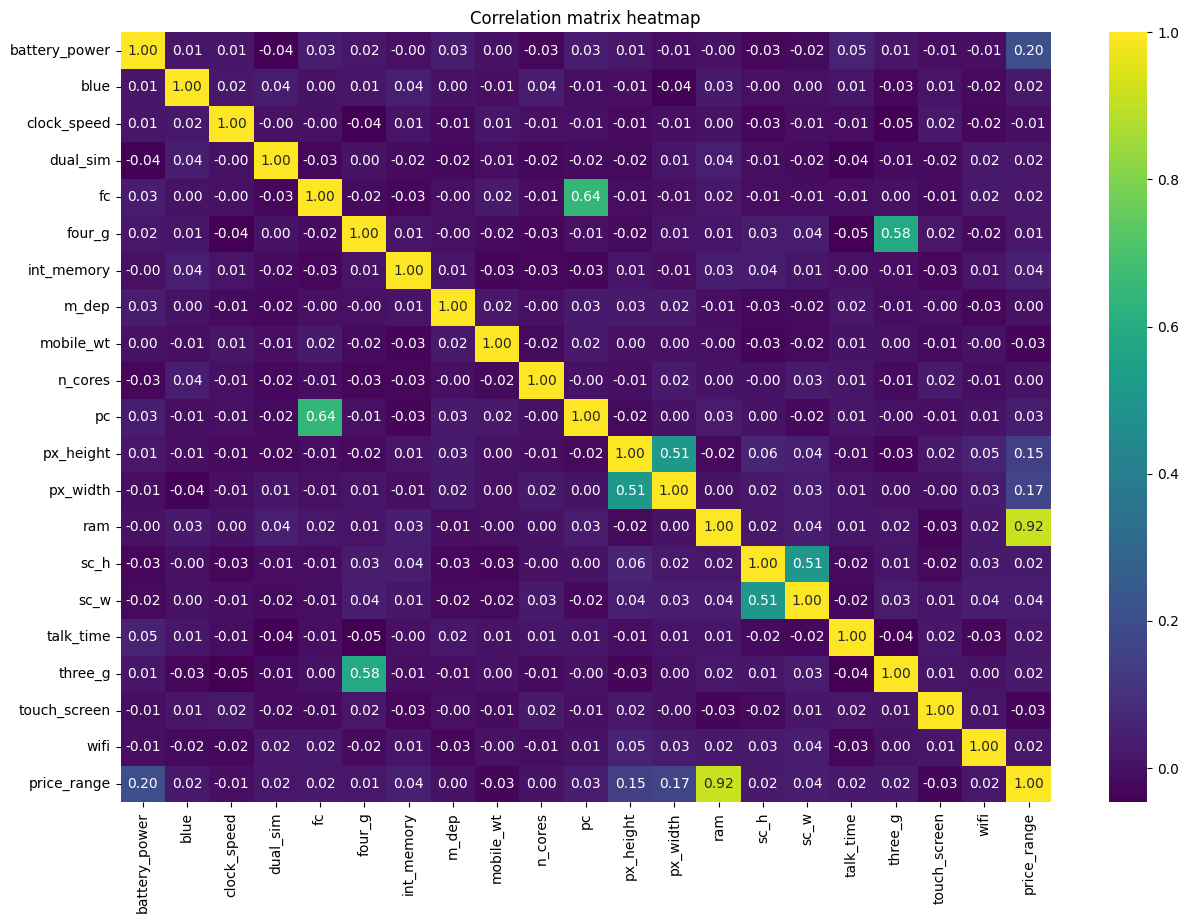

In [7]:
correlation_matrix= train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation matrix heatmap')
plt.show()

In [20]:
X=train.drop(['price_range'],axis=1)
y= train['price_range']

In [21]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [22]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [23]:
accuracy_list=[]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 123)

In [25]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_train_scale= Scaler.fit_transform(x_train)
x_test_scale= Scaler.transform(x_test)

In [27]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

model.fit(x_train_scale, y_train)

predictions = model.predict(x_test_scale)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['Decision Tree',accuracy])

Accuracy: 0.81


In [38]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100, random_state=123)

model.fit(x_train_scale, y_train)

predictions = model.predict(x_test_scale)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['Random Forest',accuracy])

Accuracy: 0.89


In [48]:
#SVC
from sklearn.svm import SVC
model= SVC()

model.fit(x_train_scale, y_train)

predictions = model.predict(x_test_scale)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
accuracy_list.append(['SVC',accuracy])

Accuracy: 0.8775


In [53]:
print("Accuracy")
for i in accuracy_list:
  print(i[0],"-->",i[1])

Accuracy
Decision Tree --> 0.81
Random Forest --> 0.89
SVC --> 0.8775
